## Problem Statement

Customer Segment Analysis:

Customer Segmentation is the problem of uncovering information about a firm's customer base based on their interactions with the business. In most cases this interaction in terms of their purchase behaviour and pattern.

You own the mall and want to understand the customers like who can be easily covered [Target Customer] so that the sense can be given to marketing team and plan the strategy accordingly.

### Importing Datasets and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape #Sample data

(200, 5)

In [5]:
data.describe() # Data statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info() # No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualization and EDA

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1600x1000 with 0 Axes>

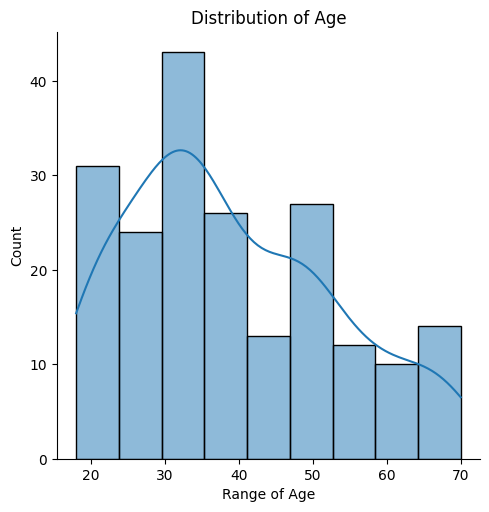

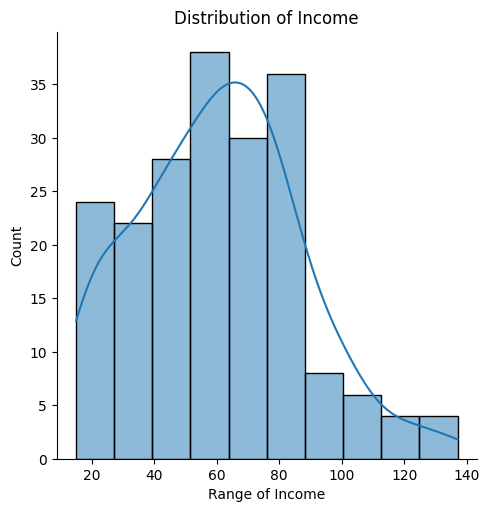

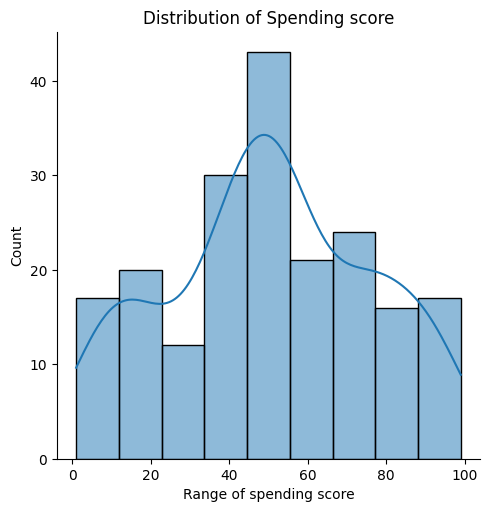

In [7]:
plt.figure(figsize=(16,10))

sns.displot(data['Age'],kde=True)
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

sns.displot(data['Annual Income (k$)'],kde=True)
plt.title('Distribution of Income')
plt.xlabel('Range of Income')
plt.ylabel('Count')

sns.displot(data['Spending Score (1-100)'],kde=True)
plt.title('Distribution of Spending score')
plt.xlabel('Range of spending score')
plt.ylabel('Count')

### Insights
Most number of people have a age between 30 to 40<br>
Most people have an income range between 60 to 70k$<br>
Spending Score have Normal(Gaussian) distribution and highest spending score is between 45 to 55<br>

In [8]:
df = data.groupby('Gender').size()

Text(0.5, 1.0, 'Gender Distribution')

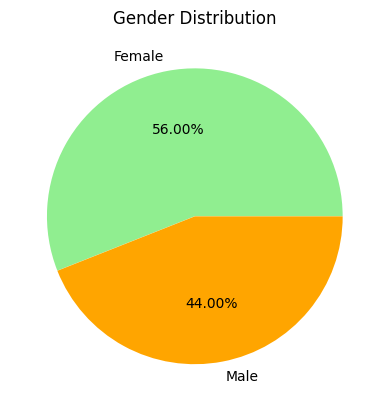

In [9]:
df.plot(kind='pie', subplots=True, colors=['lightgreen','orange'], explode=[0,0.001], labels=['Female','Male'], autopct= '%.2f%%')
plt.title('Gender Distribution')

### Insights
56% are Female and 44% are Male

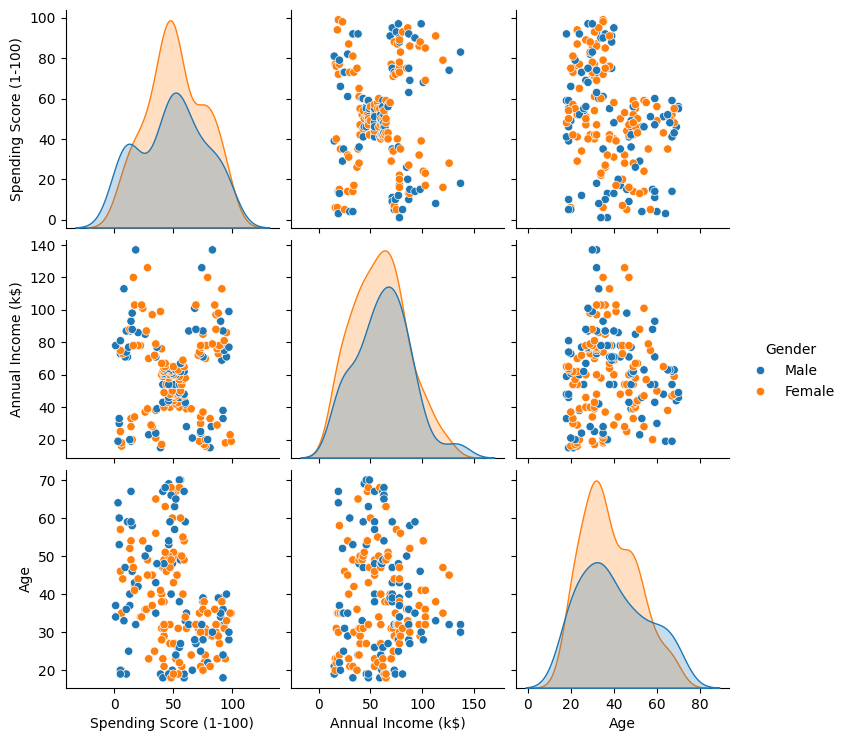

In [10]:
sns.pairplot(data,vars = ['Spending Score (1-100)','Annual Income (k$)','Age'],hue='Gender')

We can see clusters are forming in scattered data 

In [11]:
data.Age

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

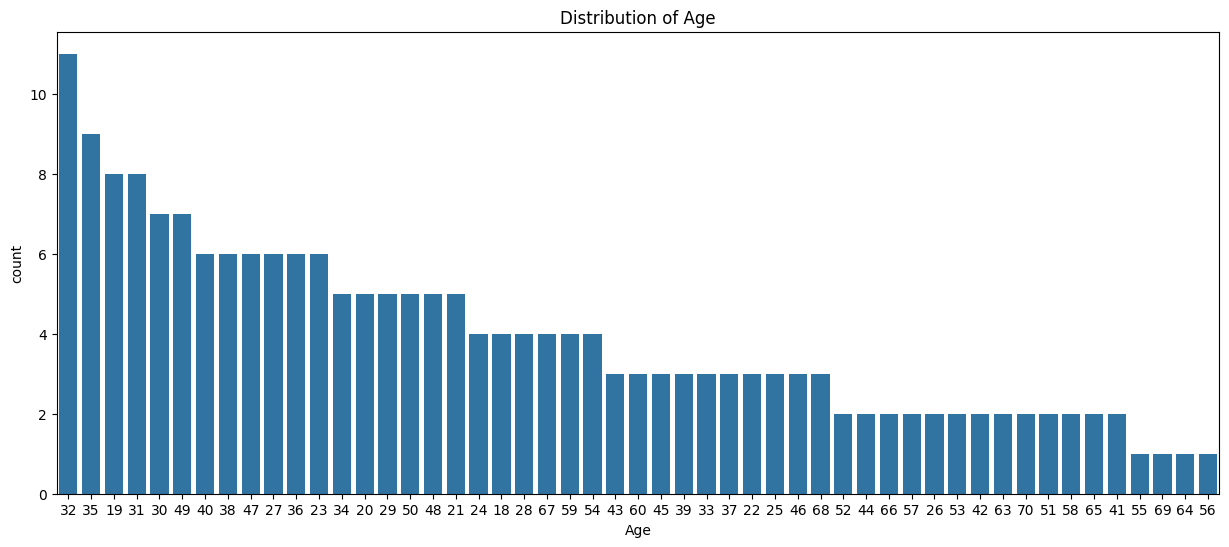

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Age', order=data.Age.value_counts().index)
plt.title('Distribution of Age')

Most visited age group is 32 and least visited is 55,56,69,64

<Axes: ylabel='Annual Income (k$)'>

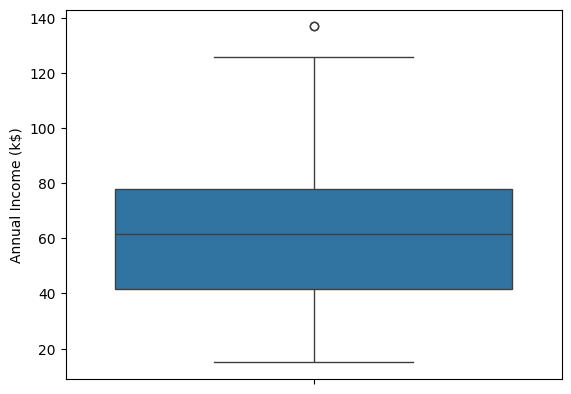

In [13]:
sns.boxplot(data['Annual Income (k$)']) ## There are Some outliers ni the income column

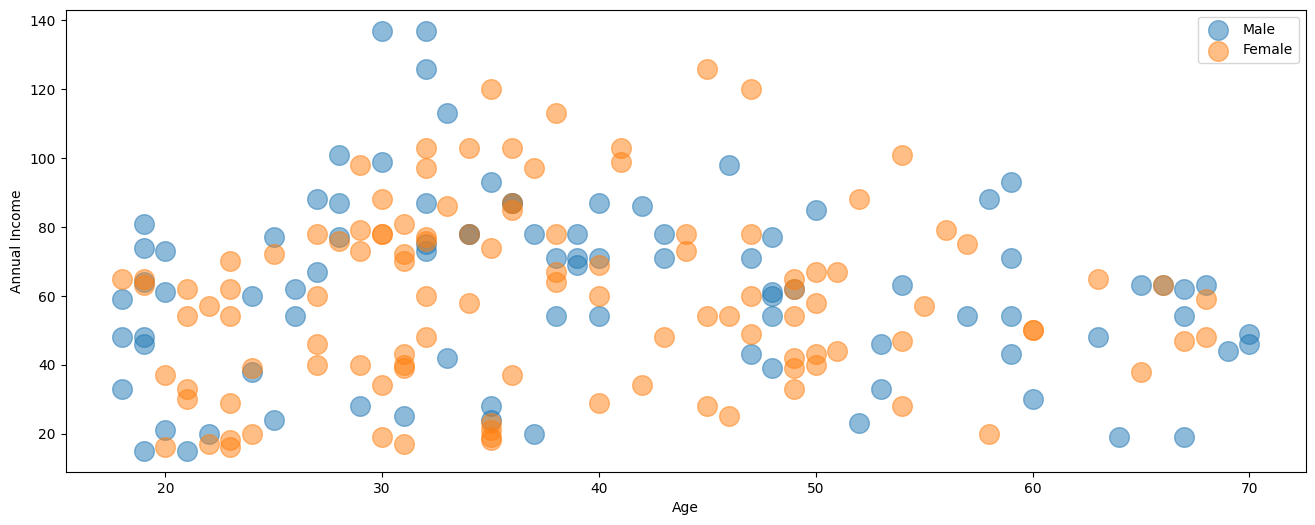

In [14]:
plt.figure(figsize=(16,6))
for gender in ['Male','Female']:
    plt.scatter(x ='Age', y='Annual Income (k$)', data=data[data['Gender']== gender], s=200, alpha=0.5,label=gender)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

Male have highest income and highset income age range is between 30-40

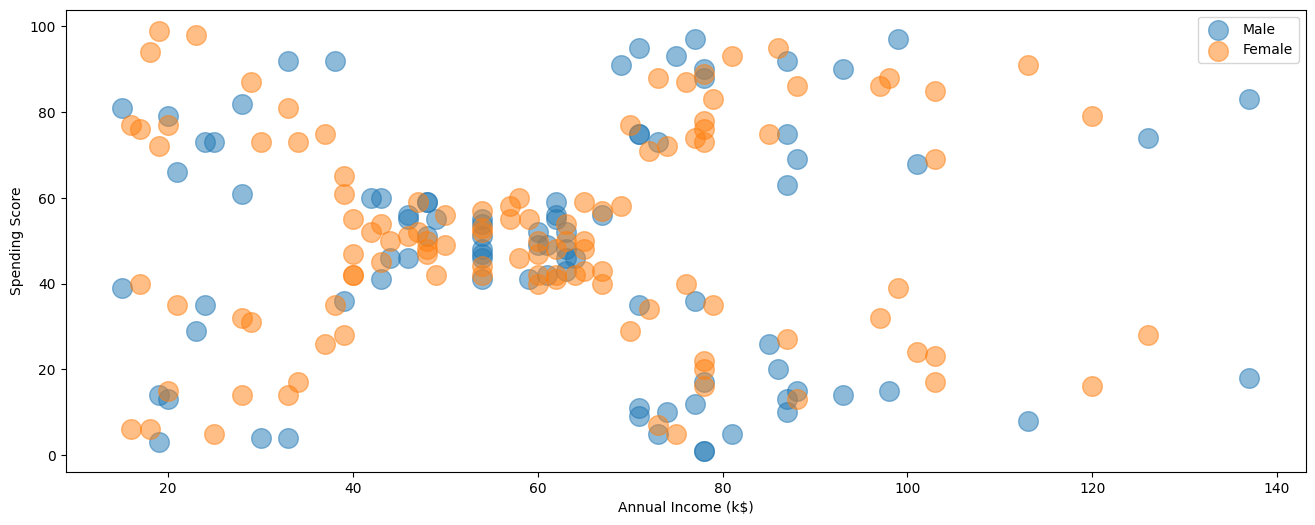

In [15]:
plt.figure(figsize=(16,6))
for gender in ['Male','Female']:
    plt.scatter(x ='Annual Income (k$)', y='Spending Score (1-100)', data=data[data['Gender']== gender], s=200, alpha=0.5,label=gender)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()

Female have the highest spending score and in general female have higher spending score than male

### K Means Clustering

In [16]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
x = data.iloc[:,[3,4]].values

In [18]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
from sklearn.cluster import KMeans

In [20]:
k = [] ## Finding the best k value for centroid using elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++',random_state=69)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

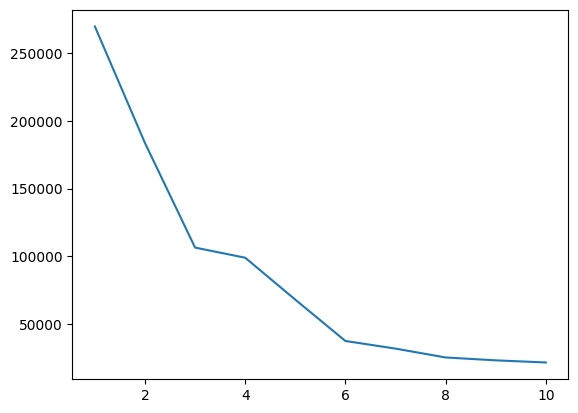

In [23]:
plt.plot(range(1,11), k)

According to the plot the optimal value of k should be 6

In [26]:
model = KMeans(n_clusters= 6, init= 'k-means++',random_state=69)
y_kmeanss = model.fit_predict(x)

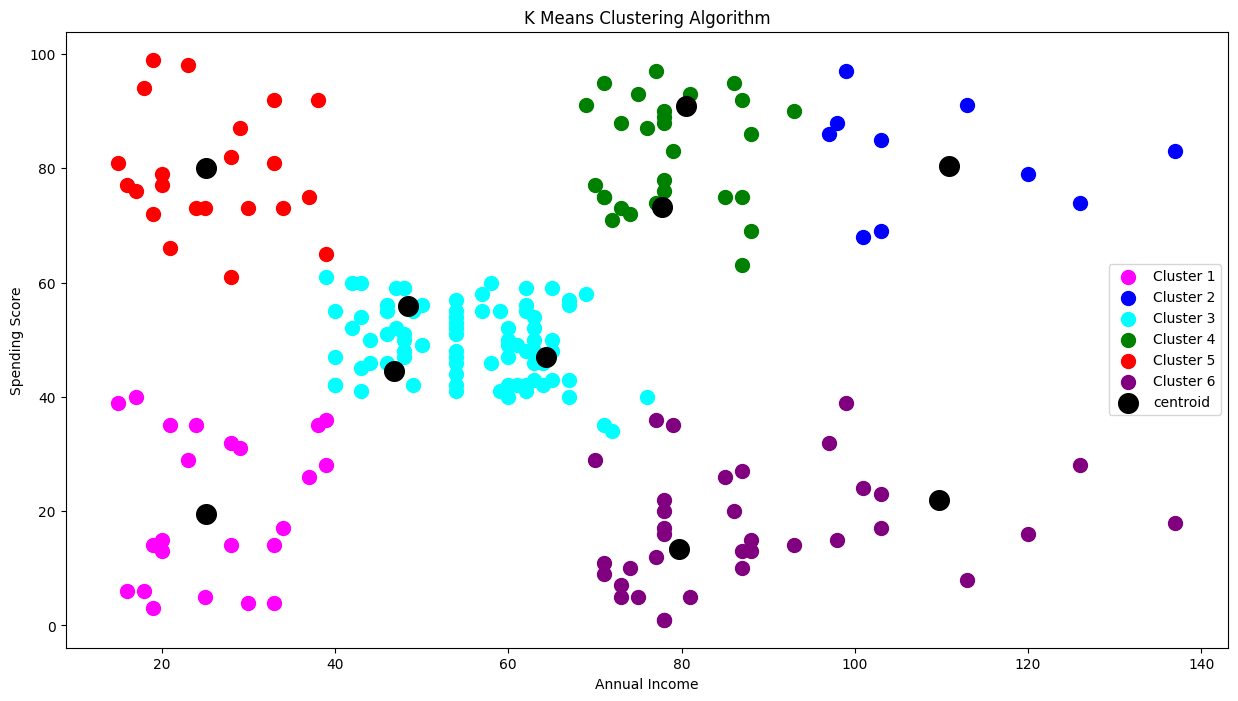

In [28]:
plt.figure(1, figsize=(15,8))
plt.scatter(x[y_kmeanss == 0,0], x[y_kmeanss==0,1],s =100, c ='magenta', label= 'Cluster 1') ## Cluster 1
plt.scatter(x[y_kmeanss == 1,0], x[y_kmeanss==1,1],s =100, c ='blue', label= 'Cluster 2') ## Cluster 2
plt.scatter(x[y_kmeanss == 2,0], x[y_kmeanss==2,1],s =100, c ='cyan', label= 'Cluster 3') ## Cluster 3
plt.scatter(x[y_kmeanss == 3,0], x[y_kmeanss==3,1],s =100, c ='green', label= 'Cluster 4') ## Cluster 4
plt.scatter(x[y_kmeanss == 4,0], x[y_kmeanss==4,1],s =100, c ='red', label= 'Cluster 5') ## Cluster 5
plt.scatter(x[y_kmeanss == 5,0], x[y_kmeanss==5,1],s =100, c ='purple', label= 'Cluster 6') ## Cluster 6
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroid')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


### Insights
Cluster 1 = People are earning less and spending less<br>
Cluster 2 = People are earning very high and spending also very high <b>[Target Customer]</b><br>
Cluster 3 = People are earning and spending on an average <b>[Target Customer]</b><br>
Cluster 4 = People are earning in average and their spending is high <b>[Target Customer]</b><br>
Cluster 5 = People are earning low but their spendnig is high <b>[Target Customer]</b><br>
Cluster 6 = People are earning quite good but they does'nt spend much

<b>Hence Overall we should target customers from Cluster 2,3,4,5